# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


<div style="direction:rtl"> 
מלאו בתא הבא את מספר הת.ז שלכם. רק מספר ת.ז., ללא שמות!!  
</div>

In [1]:
id1 = "316582758"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.DataFrame([id1])

In [4]:
df.to_clipboard(index=False,header=False)

---

----

In [5]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/hotel_bookings.csv'
data = pd.read_csv(url)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
newdata = data.copy()

In [8]:
newdata.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Q1 

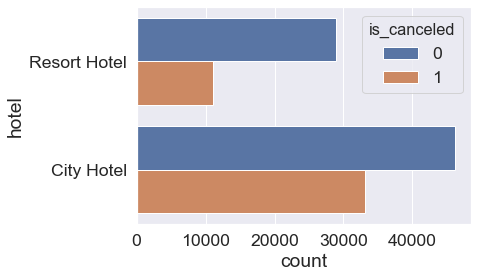

In [24]:
sns.countplot(y='hotel', hue='is_canceled', data=newdata)

 # Q2

In [10]:
newdata['children'].fillna(0,inplace=True)

In [11]:
newdata.groupby(["hotel","arrival_date_year"])[["children"]].sum().unstack()

children                
arrival_date_year     2015    2016    2017
hotel                                     
City Hotel           512.0  3814.0  2922.0
Resort Hotel         845.0  2094.0  2216.0

#### שאלתי במבחן את ליהי למה היא התכוונה - לעשות ממוצע או לרשום כמה ילדים בכל שנה . היא אמרה לי לכתוב את הסכום בכל שנה ולכן השתמשתי ב sum.()

# Q3

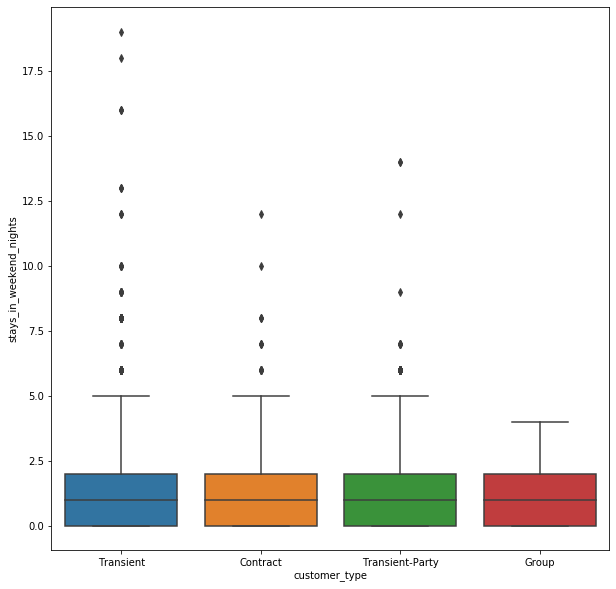

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(x='customer_type', y='stays_in_weekend_nights', data=newdata);


# Q4

In [13]:
hotels = newdata[newdata["children"]>0] 
hotelsnew = hotels[hotels["is_canceled"]==0].reset_index()
thehotel = hotelsnew[["children","is_canceled"]]
thehotel.head()

,children,is_canceled
0,1.0,0
1,2.0,0
2,2.0,0
3,1.0,0
4,2.0,0


In [14]:
thehotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5464 entries, 0 to 5463
Data columns (total 2 columns):
children       5464 non-null float64
is_canceled    5464 non-null int64
dtypes: float64(1), int64(1)
memory usage: 85.5 KB


#### יצרתי טבלה שמראה רק ילדים והאם בוטלה ההזמנה , לאחר מכן על ידי פונקצייה אינפו(מידע) ראינו שסך כל כמות השורות בדאטה פריים הוא 5464 שורות

# Q5

In [15]:
newdata.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [16]:
newdata["customer_type"]=newdata["customer_type"].astype("category").cat.codes

<Figure size 432x288 with 0 Axes>

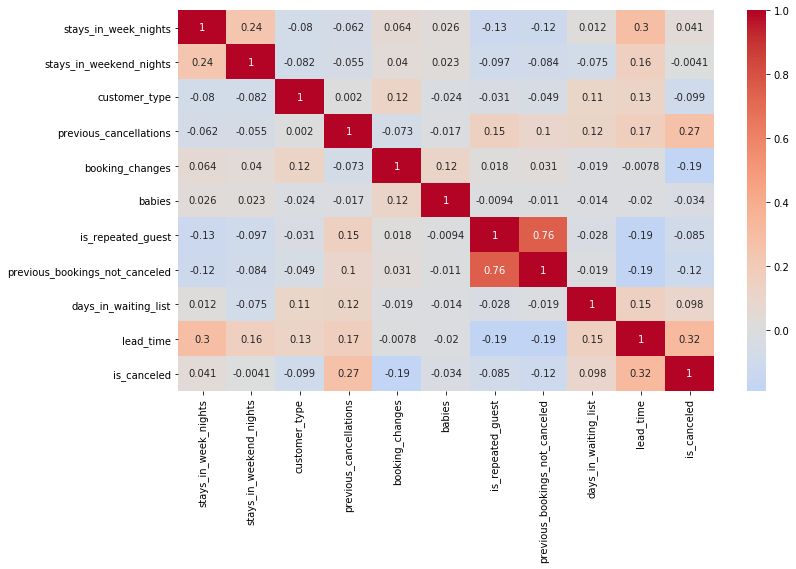

In [17]:
features = ['stays_in_week_nights', 'stays_in_weekend_nights','customer_type', 'previous_cancellations', 'booking_changes',
            'babies', 'is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list', 'lead_time', 'is_canceled' ]
corr=newdata[features].corr(method="spearman").copy()
corr
fig = plt.figure()
plt.figure(figsize=(12,7))
sns.heatmap(corr, cmap='coolwarm', center=0, annot = True)

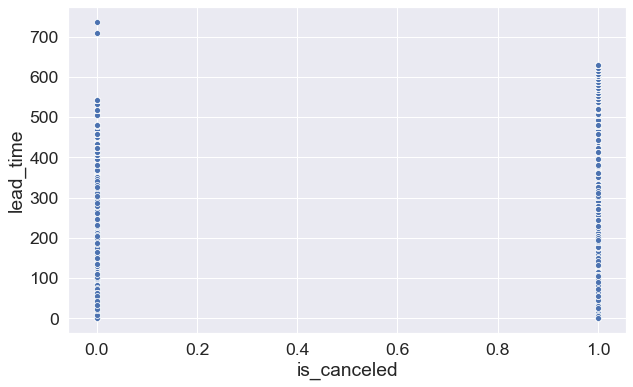

In [31]:
plt.figure(figsize = (10,6))
sns.set(style='darkgrid',font_scale=1.6)

sns.scatterplot(data=newdata, x="is_canceled",y='lead_time')

# Q6

In [19]:
features = ['stays_in_week_nights', 'stays_in_weekend_nights', 'previous_cancellations', 'booking_changes',
            'babies', 'is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list', 'lead_time']
X = newdata[features]
y = newdata['is_canceled']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)  

model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=1, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)

accuracy = sk.metrics.accuracy_score(prediction, y_test)
accuracy

0.6764944020995617

הדיוק הזה הוא יותר טוב מדיוק מקרי מכיוון שהוא גדול מ0.5 בדיוק מקרי יש לנו 50% ופה הדיוק הוא יותר מ0.5 ולכן ניתן להגיד שהדיוק הזה הוא יותר טוב מדיוק מקרי בגלל שהדיוק(0.6764944020995617) גדול מ0.5

---
# GOOD LUCK !!!!
---

In [20]:
# do not type below this line